In [239]:
import pandas as pd
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
def q90(x):
    return x.quantile(0.9)

def clean_parents(item):
            item = list(eval(item))
            return pd.Series([item[0], item[1]])

#CTAEA
base_file_name = ["_1_100-200_SV0-CV2-MV","_MM0.2-MC0.1-MB0.1_tracker.csv"]
# Resto
base_file_name = ["_1_200-200_SV0-CV2-MV","_MM0.2-MC0.1-MB0.1_tracker.csv"]


algorithm_names = ["CTAEA","SMSEMOA","NSGA2","UNSGA3"]

mutation = "0"
# problem = "zdt%i"%5
algorithm = "NSGA2"


file_tracker = open(f"data/Test1/{algorithm}{base_file_name[0]}{mutation}{base_file_name[1]}", "r")




df = pd.read_csv(file_tracker)
print(df.head(2))
print(df.tail(2))


df[["parent1","parent2"]]=df["parent"].apply(clean_parents)

# Reformat values of "isF"
df.isF.fillna(False,inplace=True)
df.loc[df.isF=="true","isF"]=True
df.loc[df.isF=="false","isF"]=False


df["rank"].fillna(0,inplace=True)


mask = df.groupby(by=["idx"],as_index=False)["iter"].agg([min,max])
mask["lifeIter"] = mask["max"]-mask["min"]
dfMutates = df[["idx","mutate"]].drop_duplicates()
dfMutates.fillna(False,inplace=True)
df2 = pd.merge(mask,dfMutates,on=["idx"],how="inner")

dft = pd.merge(df,df2,on=["idx"],how="inner")
dft["name"]=dft["idx"]+"_"+dft["iter"].astype(str)

#Network data
import networkx as nx
edgesp1 = zip(dft["parent1"],dft["idx"])
edgesp2 = zip(dft["parent2"],dft["idx"])

G1 = nx.Graph()
G1.add_edges_from(edgesp1)
G1.add_edges_from(edgesp2)
G1.remove_node("0")
degree = dict(G1.degree)
dft["degree"] = dft.idx.map(degree)

dft.rename(columns={"mutate_y":"mutate"},inplace=True)


   iter   idx  created_gen  rank  crowding      parent mutate mutate_rate  \
0     1  1_21            1   0.0       inf  ['0', '0']    NaN         NaN   
1     1  1_42            1   0.0  0.383498  ['0', '0']    NaN         NaN   

    isF  
0  True  
1  True  
       iter      idx  created_gen  rank  crowding                  parent  \
39998   200  200_141          200   0.0  0.005697    ['197_75', '174_63']   
39999   200  190_125          190   0.0  0.005682  ['175_121', '187_172']   

      mutate mutate_rate   isF  
39998    NaN         NaN  True  
39999    NaN         NaN  True  


In [240]:


dig = dft.groupby("idx").first()
dig

,iter,created_gen,rank,crowding,parent,mutate_x,mutate_rate,isF,parent1,parent2,min,max,lifeIter,mutate,name,degree
idx,,,,,,,,,,,,,,,,
100_10,100,100,0.0,0.021979,"['96_88', '91_69']",None,None,True,96_88,91_69,100,102,2,False,100_10_100,2
100_102,100,100,0.0,0.024581,"['99_48', '98_82']",None,None,True,99_48,98_82,100,100,0,False,100_102_100,4
100_11,100,100,0.0,0.012244,"['93_1', '91_135']",None,None,True,93_1,91_135,100,105,5,False,100_11_100,2
100_12,100,100,0.0,0.004441,"['98_82', '99_48']",None,None,True,98_82,99_48,100,100,0,False,100_12_100,2
100_122,100,100,0.0,0.009785,"['91_32', '82_136']",None,None,True,91_32,82_136,100,101,1,False,100_122_100,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_9,9,9,3.0,0.030748,"['7_26', '5_43']",None,None,False,7_26,5_43,9,9,0,False,9_9_9,3
9_91,9,9,2.0,0.011640,"['7_131', '8_119']",None,None,False,7_131,8_119,9,11,2,False,9_91_9,2
9_92,9,9,0.0,inf,"['8_45', '8_57']",None,None,True,8_45,8_57,9,13,4,False,9_92_9,12


### Diferencias entre mutados y no mutados 

In [241]:
dfi = dig[dig["mutate"]==True].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns={"lifeIter":"life Mutate"},level=0)
dfi2 = dig[dig["mutate"]==False].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns={"lifeIter":"life NoMut"},level=0)

In [242]:
dfi

life Mutate     
            mean  q90
iter                 
2       0.804878  2.0
3       1.000000  2.7
4       1.444444  4.0
5       1.200000  3.0
6       1.027778  2.5
...          ...  ...
196     2.333333  3.6
197     2.000000  3.0
198     2.000000  2.0
199     1.000000  1.0
200     0.000000  0.0

[190 rows x 2 columns]

In [243]:
idx = pd.IndexSlice
dfti = dfi.merge(dfi2, left_on='iter', right_on='iter')

s = dfti.loc[:,idx["life Mutate","mean"]] - dfti.loc[:,idx["life NoMut","mean"]]
print(s.describe())
sq = dfti.loc[:,idx["life Mutate","q90"]] - dfti.loc[:,idx["life NoMut","q90"]]
print(sq.describe())

count    190.000000
mean      -1.240235
std        3.057632
min      -10.727273
25%       -2.600198
50%       -0.630952
75%        0.037234
max       17.142857
dtype: float64
count    190.000000
mean      -4.875789
std        6.551767
min      -36.000000
25%       -7.600000
50%       -3.050000
75%       -0.400000
max       11.400000
dtype: float64


<Axes: xlabel='iter'>

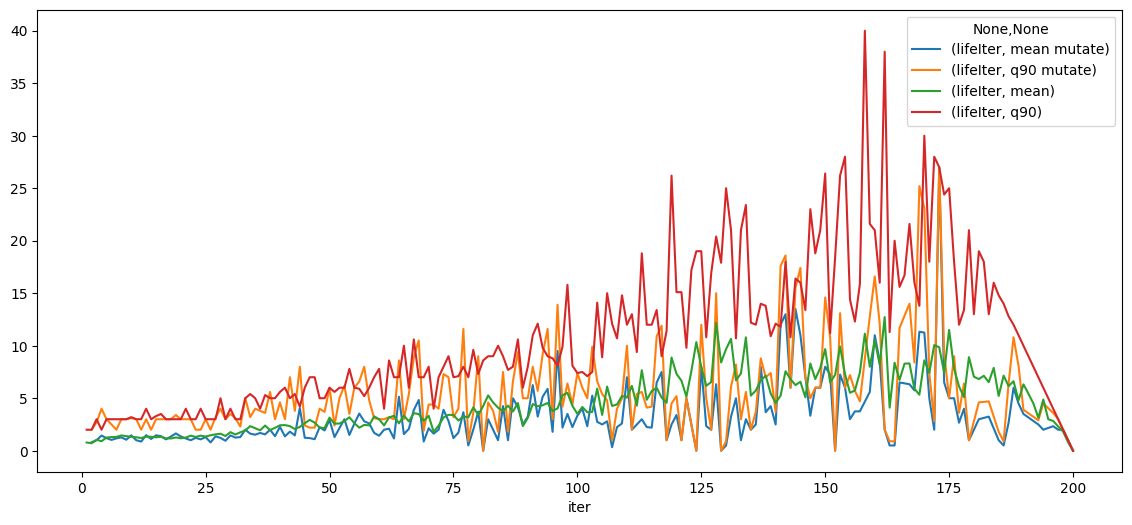

In [244]:
# Para calcular la distribución de vida
# hay que eliminar individuos que no pertenecen a esa iter
di = dft[dft.iter==dft.created_gen]

fig, ax = plt.subplots(figsize=(14,6))
di[di["mutate"]==True].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns = {'mean': 'mean mutate',"q90":"q90 mutate"},level=1).plot(ax=ax)
di[di["mutate"]==False].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).plot(ax=ax)
# di.groupby(by="iter").aggregate({"lifeIter":[np.mean]}).plot()


<Axes: xlabel='iter'>

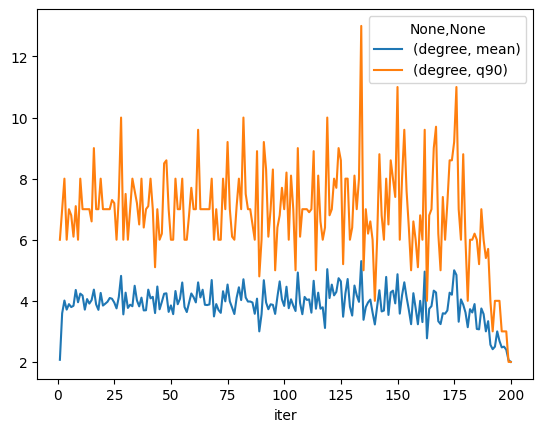

In [245]:

dig.groupby(by="iter").aggregate({"degree":[np.mean,q90]}).plot()

In [246]:
# agrupar varias generaciones en una sola

di["a_iter"]=di["iter"]//5

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_24285/2995766977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di["a_iter"]=di["iter"]//5


<Axes: xlabel='a_iter'>

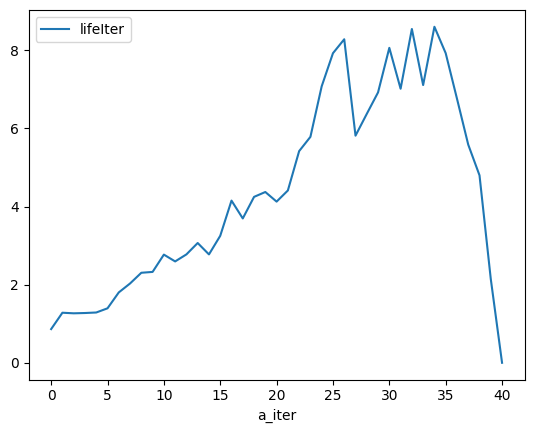

In [247]:
di.groupby(by="a_iter").aggregate({"lifeIter":np.mean}).plot()

<Axes: xlabel='a_iter', ylabel='lifeIter'>

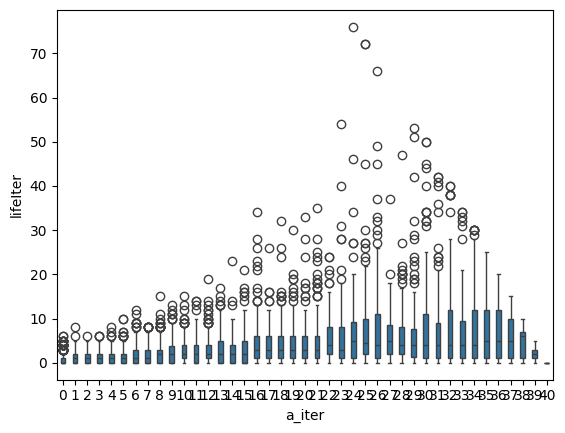

In [248]:
sns.boxplot(data=di, x="a_iter", y="lifeIter", gap=.5)

<Axes: xlabel='iter', ylabel='degree'>

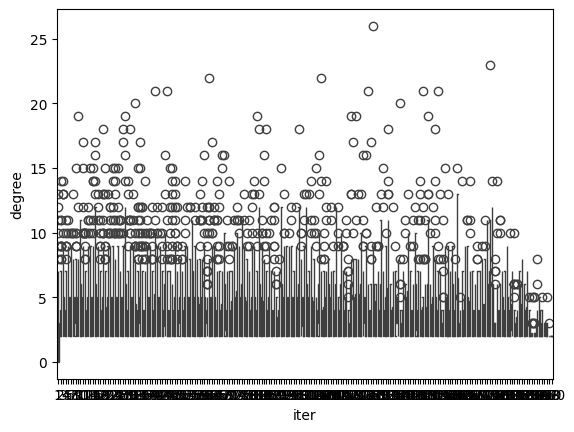

In [249]:
sns.boxplot(data=dig, x="iter", y="degree", gap=.5)

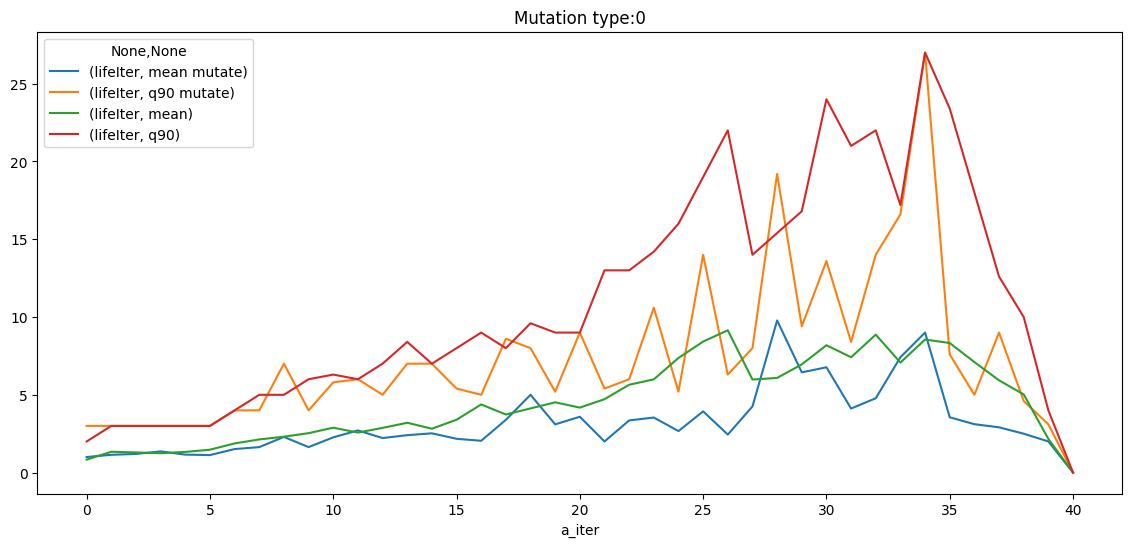

In [250]:
#agrupadas
fig, ax = plt.subplots(figsize=(14,6))
di[di["mutate"]==True].groupby(by="a_iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns = {'mean': 'mean mutate',"q90":"q90 mutate"},level=1).plot(ax=ax)
di[di["mutate"]==False].groupby(by="a_iter").aggregate({"lifeIter":[np.mean,q90]}).plot(ax=ax)
plt.title("Mutation type:%s"%mutation)
plt.savefig(f"images/fpp_serie_{algorithm}_{mutation}.png")

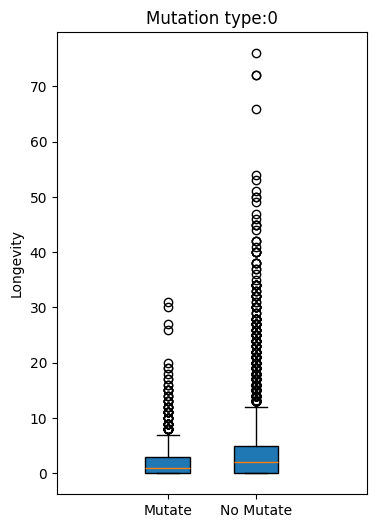

In [251]:
fig, ax = plt.subplots(figsize=(4,6))
valuesdict = {"Mutate":di[di["mutate"]==True]["lifeIter"],
                "No Mutate":di[di["mutate"]==False]["lifeIter"]}

bp1 = ax.boxplot(valuesdict["Mutate"], positions=[1], widths=0.2, patch_artist=True)
bp2 = ax.boxplot(valuesdict["No Mutate"], positions=[1.4], widths=0.2, patch_artist=True)
ax.set_xticks([1, 1.4])
ax.set_xticklabels(['Mutate', 'No Mutate'])
ax.set_ylabel('Longevity')
plt.title("Mutation type:%s"%mutation)
plt.savefig(f"images/fpp_box_{algorithm}_{mutation}.png")

In [252]:
## CDF y PDF
dfone = dft.groupby("idx").first()
stats_df = dfone.groupby('lifeIter')['lifeIter'].agg('count').pipe(pd.DataFrame).rename(columns = {'lifeIter': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df


,lifeIter,frequency,pdf,cdf
0,0,2449,0.267738,0.267738
1,1,1787,0.195365,0.463103
2,2,1295,0.141576,0.604679
3,3,935,0.102219,0.706898
4,4,574,0.062753,0.769651
5,5,455,0.049743,0.819394
6,6,340,0.037171,0.856565
7,7,245,0.026785,0.883350
8,8,197,0.021537,0.904887
9,9,155,0.016945,0.921832


<Axes: xlabel='lifeIter'>

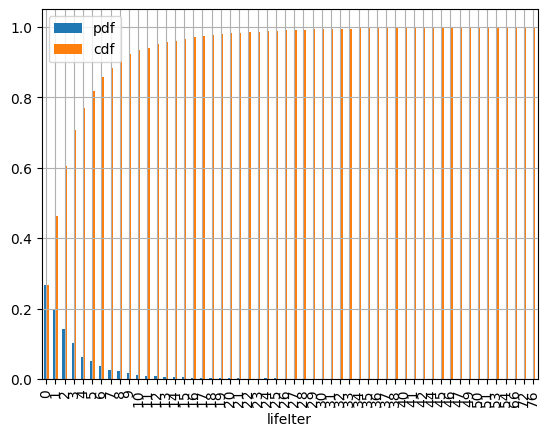

In [253]:
stats_df.plot.bar(x = 'lifeIter', y = ['pdf', 'cdf'], grid = True)